In [15]:
import numpy as np
from numpy import random
import cascade
import matplotlib.pyplot as plt
#from numba import jit, cuda

We will define the model, N is the number of synapse, n is the number of cascades, fp is the fraction of potentiations, fm is the fraction of depressions, x is the base of the exponential probabilities p and q (refer the paper) 

In [16]:
model = cascade.model(N=10000, n=10, fp=0.5, fm=0.5, x=0.5)

Now we initialize the synapse network "state_0"

In [17]:
state_0 = model.init()

Now we induce a memory into this initilized state

In [18]:
state = model.memory(state_0)

Now we update the state with our memory trace with external random potentiations and depressions, and then calculate the Memory signal "S" at every update to see how long the signal persists

In [19]:
S=[]
rt_max = 50
#@jit(target_backend='cuda')
for i in range(50):
    if i%10==0:
        print(i)
    S.append(model.Sig(state))
    model.update(state)

0
10
20
30
40


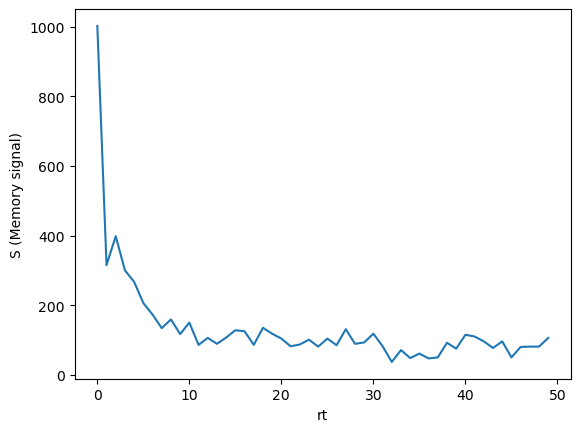

In [20]:
plt.xlabel('rt')
plt.ylabel('S (Memory signal)')
plt.plot(S)